In [2]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [3]:
torch.cuda.is_available()

True

In [4]:
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.enabled)

2.5.1+cu121
12.1
True


In [5]:
sizes = list(range(12, 1200, 12))
time_spend_cpu=[]
for n in tqdm(sizes):
    tensor_1_cpu = torch.randn(n,n,3)
    tensor_2_cpu = torch.randn(3,n)
    t = time.time()
    tensor_1_cpu@tensor_2_cpu
    elapsed = time.time() - t
    time_spend_cpu.append(elapsed)

100%|██████████| 99/99 [01:06<00:00,  1.49it/s] 


In [6]:
time_spend_gpu=[]

for n in tqdm(sizes):
    tensor_1_gpu = torch.randn(n, n, 3, device='cuda')
    tensor_2_gpu = torch.randn(3, n, device='cuda')
    t = time.time()
    tensor_1_gpu@tensor_2_gpu
    elapsed = time.time() - t
    time_spend_gpu.append(elapsed)

100%|██████████| 99/99 [00:41<00:00,  2.41it/s]


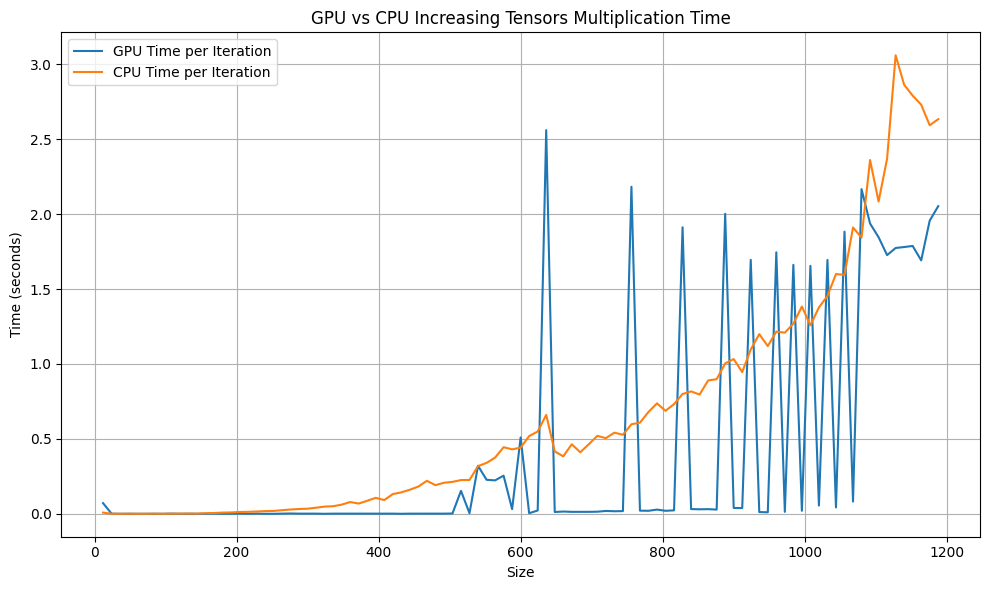

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, time_spend_gpu, label='GPU Time per Iteration')
plt.plot(sizes, time_spend_cpu, label='CPU Time per Iteration')
plt.xlabel('Size')
plt.ylabel('Time (seconds)')
plt.title('GPU vs CPU Increasing Tensors Multiplication Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
def transformation (theta, sx, sy, tx, ty):
    # scaling = torch.tensor([
    #     [sx, 0.0, 0.0],
    #     [0.0, sy, 0.0],
    #     [0.0, 0.0, 1.0]
    # ])
    # rotation = torch.tensor([
    #     [math.cos(theta), -math.sin(theta), 0.0],
    #     [math.sin(theta),  math.cos(theta), 0.0],
    #     [0.0, 0.0, 1.0]
    # ])
    # translation_mat = torch.tensor([
    #     [1.0, 0.0, tx],
    #     [0.0, 1.0, ty],
    #     [0.0, 0.0, 1.0]
    # ])
    transform_matrix = (torch.tensor([
        [sx*math.cos(theta), sy*-math.sin(theta), tx],
        [sx*math.sin(theta), sy*math.cos(theta), ty],
        [0.0, 0.0, 1.0]
    ]))
    #translation_mat @ rotation @ scaling

    return transform_matrix
    

In [9]:
vec = torch.tensor([1.0, 2.0, 1.0])
t=transformation(math.radians(0), 2.0, 2.0, 1.0, 1.0)
result = t@vec
print(result)

tensor([3., 5., 1.])


In [12]:
torch.cuda.empty_cache()